The purpose of this notebook is to remove the seasonal cycle from the sea level anomalies. Currently, the seasonal anomalies are computed relative to a historic record time mean, so a lot of the variance in sea level can be attributed to the large scale-seasonal variations.

Created 9/9/20  
Update 9/10/20: Work with absolute sea level instead of sea level anomalies
Update 9/10/20: Incorporate 5-day rolling mean

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import seaborn as sns
import cmocean.cm as cmo

In [12]:
## Here, we'll work with the sea level, and remove the seasonal cycle from there
flattened_sl = xr.open_dataarray('~/Research/data/coastal_masked_sl.nc')

In [16]:
## Define the seasonality as the sea level averaged over the temporal record for each day of the year.
seasonality = flattened_sl.groupby("time.dayofyear").mean("time")
rolling = seasonality.rolling(dayofyear=5, center=True, min_periods=1).mean()
seasonal_anomaly = flattened_sl.groupby("time.dayofyear") - rolling

/Users/andrewbrettin/opt/anaconda3/envs/pangeo/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


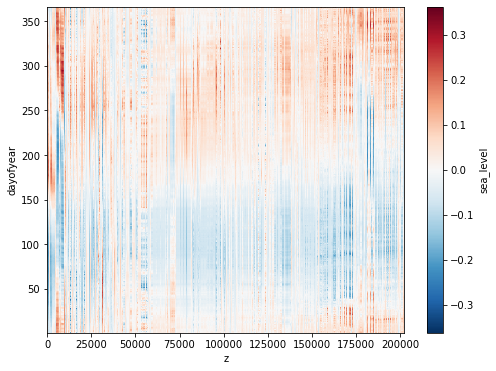

In [5]:
## Shows roughly that sea level in the globe is generally higher in the NH summer/fall
## and lower during the NH winter/spring
fig, ax = plt.subplots(figsize=(8,6))
seasonality.plot(ax=ax)

Text(0.5, 0, 'Time [year]')

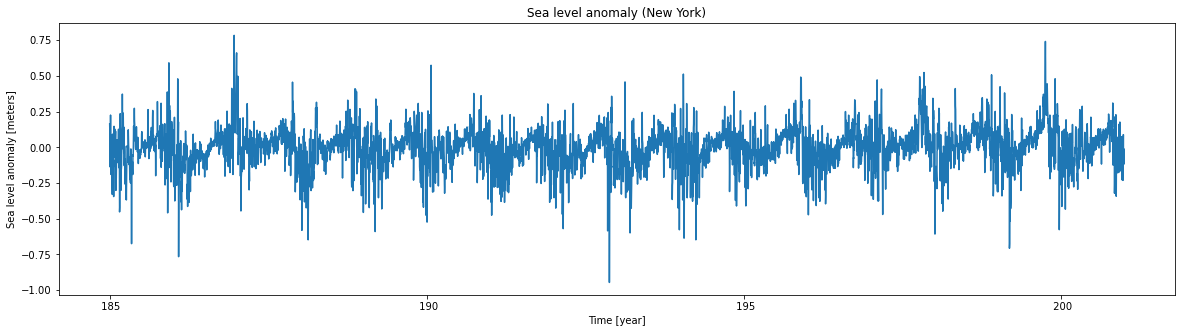

In [7]:
## Case study: New York
fig, ax = plt.subplots(figsize=(20, 5))
new_york = flattened_sl.isel(z=106681)
new_york.plot(ax=ax)
ax.set_title('Sea level anomaly (New York)')
ax.set_ylabel('Sea level anomaly [meters]')
ax.set_xlabel('Time [year]')
#new_york_seasonal_removed = seasonal_anomaly.isel(z=106681)
#new_york_seasonal_removed.plot()

It's clear that there's significant seasonal variability.

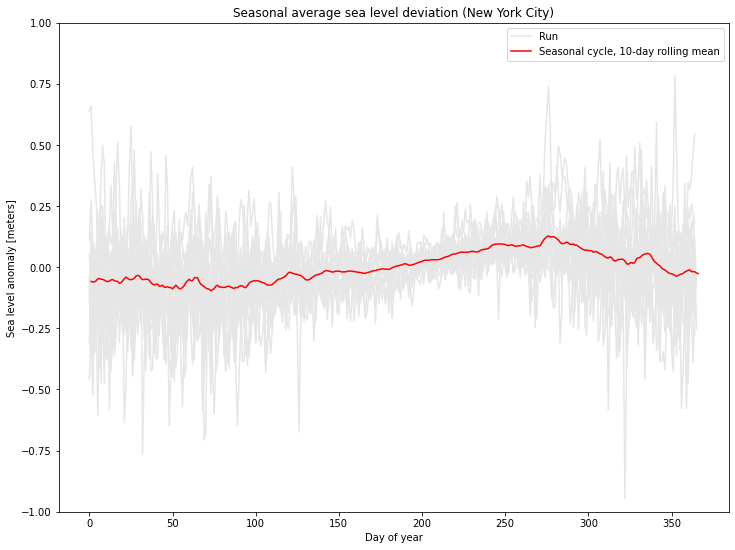

In [15]:
fig, ax = plt.subplots(figsize=(12,9))

for year in np.arange(185, 201):
    year_string = str(year).zfill(4)
    annual_sl_nyc = new_york.sel(time=year_string).data
    dayofyear = np.arange(len(annual_sl_nyc))
    if year==185:
        label='Run'
    else:
        label=''
    ax.plot(dayofyear, annual_sl_nyc, color=(0.9, 0.9, 0.9), label=label)
    
# seasonality.isel(z=106681).plot(ax=ax, c='b', label='Seasonal cycle, no rolling')
rolling.isel(z=106681).plot(ax=ax, c='r', label='Seasonal cycle, 10-day rolling mean')
ax.set_title('Seasonal average sea level deviation (New York City)')
ax.set_xlabel('Day of year')
ax.set_ylabel('Sea level anomaly [meters]')
ax.set_ylim(-1, 1)
ax.legend()

fig.savefig('new_york_seasonal_cycle.png')

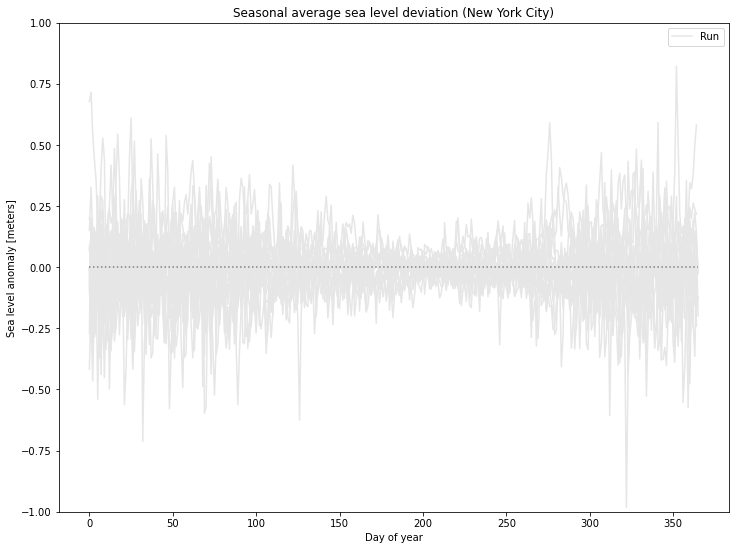

In [20]:
## Plot seasonal anomaly: should be pretty much neutral noise:
new_york_anom = seasonal_anomaly.isel(z=106681)
fig, ax = plt.subplots(figsize=(12,9))

for year in np.arange(185, 201):
    year_string = str(year).zfill(4)
    annual_sl_nyc = new_york_anom.sel(time=year_string).data
    dayofyear = np.arange(len(annual_sl_nyc))
    if year==185:
        label='Run'
    else:
        label=''
    ax.plot(dayofyear, annual_sl_nyc, color=(0.9, 0.9, 0.9), label=label)

# seasonality.isel(z=106681).plot(ax=ax, c='b', label='Seasonal cycle, no rolling')
ax.plot(np.arange(366), np.zeros(366), linestyle=':', c=(0.5,0.5,0.5))
ax.set_title('Seasonal average sea level deviation (New York City)')
ax.set_xlabel('Day of year')
ax.set_ylabel('Sea level anomaly [meters]')
ax.set_ylim(-1, 1)
ax.legend()

fig.savefig('new_york_seasonal_cycle.png')

In [25]:
## This seems legit, so we'll save the anomalies as a separate xarray dataarray
# seasonal_anomaly.to_netcdf('~/Research/data/seasonal_anomaly.nc')
seasonal_anomaly.nbytes / 1e9

4.735416576

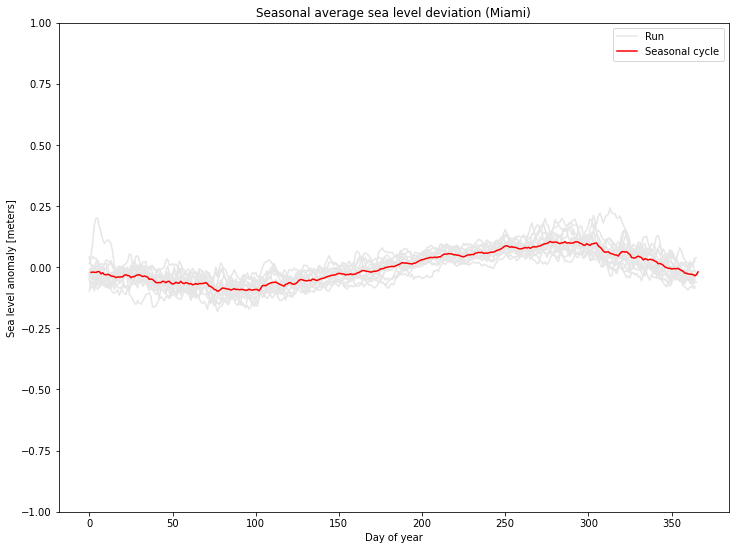

In [11]:
## Other cities
## Miami

miami_z = 97037
miami = flattened_sl.isel(z=miami_z)

fig, ax = plt.subplots(figsize=(12,9))

for year in np.arange(185, 201):
    year_string = str(year).zfill(4)
    annual_sl_nyc = miami.sel(time=year_string).data
    dayofyear = np.arange(len(annual_sl_nyc))
    if year==185:
        label='Run'
    else:
        label=''
    ax.plot(dayofyear, annual_sl_nyc, color=(0.9, 0.9, 0.9), label=label)
    
seasonality.isel(z=miami_z).plot(ax=ax, c='r', label='Seasonal cycle')
ax.set_title('Seasonal average sea level deviation (Miami)')
ax.set_xlabel('Day of year')
ax.set_ylabel('Sea level anomaly [meters]')
ax.set_ylim(-1, 1)
ax.legend()

fig.savefig('miami_seasonal_cycle.png')

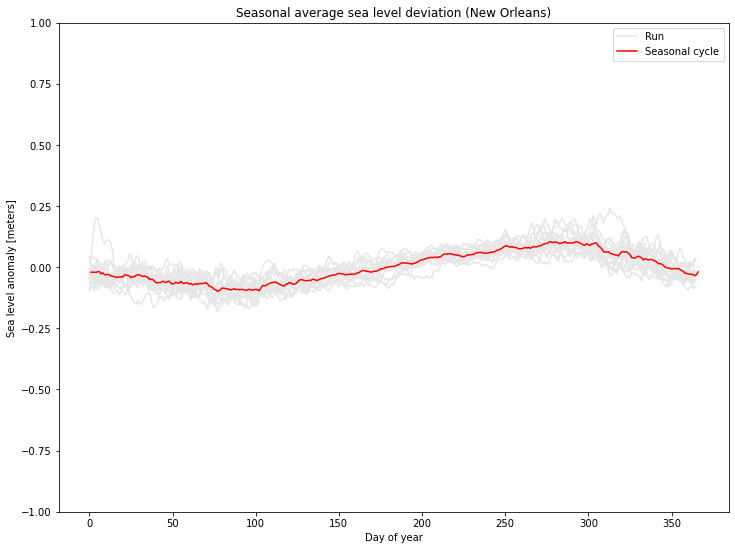

In [13]:
new_orleans_z = 97037
new_orleans = flattened_sl.isel(z=new_orleans_z)

fig, ax = plt.subplots(figsize=(12,9))

for year in np.arange(185, 201):
    year_string = str(year).zfill(4)
    annual_sl_nyc = miami.sel(time=year_string).data
    dayofyear = np.arange(len(annual_sl_nyc))
    if year==185:
        label='Run'
    else:
        label=''
    ax.plot(dayofyear, annual_sl_nyc, color=(0.9, 0.9, 0.9), label=label)
    
seasonality.isel(z=new_orleans_z).plot(ax=ax, c='r', label='Seasonal cycle')
ax.set_title('Seasonal average sea level deviation (New Orleans)')
ax.set_xlabel('Day of year')
ax.set_ylabel('Sea level anomaly [meters]')
ax.set_ylim(-1, 1)
ax.legend()